<h2>OpenFMRI Study Forrest dataset</h2>
<h3>Correlation Analysis of Heart-Rate Variation (HRV) vs Emotion Annotations for Forrest Gump Movie</h3>
<h2>Michael A. Casey - Dartmouth College, Data and Code: 2013 - 2019</h2>

<h3>This notebook performs the following analyses:</h3>
<ol>
    <li>Extract HRV and Evaluate Movie-Segment Recall Precision
    <li>Load and Inspect Emotion Annotations
    <li>Inspect Between-Subject-HRV / Emotion Correlations (Whole Movie)
    <li>Retrieve Movie Locations by Highest-Precision Segments (Recalled by HRV)
    <li>Retrieve Annotations for Highest-Precision Segments (Recalled by HRV)
    <li>Inspect Individual Differences in HRV-Emotion Correlations
    <li>Inspect Within-Subject HR Traces (Per Movie Segments, TR=2.0s)
    <li>Demonstrate Heart-Rate Extraction via Auto-Correlation Peaks
</ol>

<h3>The Physiological Data:</h3>
This dataset contains files for 20 subjects, 8 runs per subject. This folder contains only the physiological data.

Location sub[ID]/physio/task001_run00[1-8]/physio.txt.gz 

Physiological data were:

- truncated to start with the first MRI trigger pulse and to end one volume acquisition duration after the last trig-ger pulse. Data are provided in a four-column (MRI trigger, respira-tory trace, cardiac trace and oxygen saturation), space-delimited text file for each run. A log file of the automated conversion procedure is provided in the same directory (conversion.log). Sampling rate for the majority of all participants is 200 Hz.

- recorded simultaneously with the fMRI data acquisition using a custom setup25 and in-house recording software (written in Python). A Nonin 8600 FO pulse oxymeter (Nonin Medical, Inc, Plymouth, MN, USA) was used to measure cardiac trace and oxygen saturation, and a Siemens respiratory belt connected to a pressure sensor (Honeywell 40PC001B1A) captured the respiratory trace. Analog signals were digitized (12 bit analog digital converter, National Instruments USB-6008) at a sampling rate of 200 Hz. The digitizer also logged the volume acquisition trigger pulse emitted by the MRI scanner.

- down-sampled to <b>100 Hz</b> and truncated to start with the first MRI trigger pulse and to end one volume acquisition duration after the last trigger pulse. Data are provided in a four-column (MRI trigger, respiratory trace, cardiac trace and oxygen saturation), space-delimited text file for each movie segment. A log file of the automated conversion procedure is provided in the same directory (conversion.log).

<h3>The Emotion Annotation Data:</h3>
Annotations of portrayed emotions in the movie "Forrest Gump":

FILE: 'stimulus/task001/annotations/emotions/timeseries/ioats_2s_ao_allchar.csv'

These annotation correspond to the audio-movie version.

A detailed description of this dataset can be found in the open-access
article:

  Annika Labs, Theresa Reich, Helene Schulenburg, Manuel Boennen,
  Mareike Gehrke, Madleen Golz, Benita Hartigs, Nico Hoffmann,
  Sebastian Keil, Malu Perlow, Anne Katrin Peuckmann, Lea Noell Rabe,
  Franca-Rosa von Sobbe & Michael Hanke. Portrayed emotions in
  the movie "Forrest Gump". F1000Research 2015

All data is released under the terms of the CC0 license.
    

In [1]:
import forresthrv as f # CASEY Lab HRV functions for StudyForrest Dataset
import matplotlib.pyplot as plt # plotting functions
import numpy as np # numerical functions
from scipy.signal import find_peaks # for HR extraction 
from scipy.fftpack import fftshift # for HR extraction
from scipy.stats import mannwhitneyu, spearmanr # statistical tests
import csv # data reader

160 PHYSIOLOGICAL DATA FILES FOUND


<h2>Analysis 1: Extract HRV and Evaluate Movie-Segment Recall Precision</h2>

hr_len: 20 hr_step: 2
Loading cache file: hr_data_20_2_2019-11-17.pickle
match_len: 120 match_step: 2
subj000: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ! !
subj001: 0 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ! !
subj002: 0 1 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ! !
subj003: 0 1 2 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ! !
subj004: 0 1 2 3 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ! !
subj005: 0 1 2 3 4 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !
subj006: 0 1 2 3 4 5 7 8 9 10 11 12 13 14 15 16 17 18 19 ! !
subj007: 0 1 2 3 4 5 6 8 9 10 11 12 13 14 15 16 17 18 19 ! !
subj008: 0 1 2 3 4 5 6 7 9 10 11 12 13 14 15 16 17 18 19 ! !
subj009: 0 1 2 3 4 5 6 7 8 10 11 12 13 14 15 16 17 18 19 ! !
subj010: 0 1 2 3 4 5 6 7 8 9 11 12 13 14 15 16 17 18 19 ! !
subj011: 0 1 2 3 4 5 6 7 8 9 10 12 13 14 15 16 17 18 19 ! !
subj012: 0 1 2 3 4 5 6 7 8 9 10 11 13 14 15 16 17 18 19 ! !
subj013: 0 1 2 3 4 5 6 7 8 9 10 11 12 14 15 16 17 18 19 ! !
subj014: 0 1 2

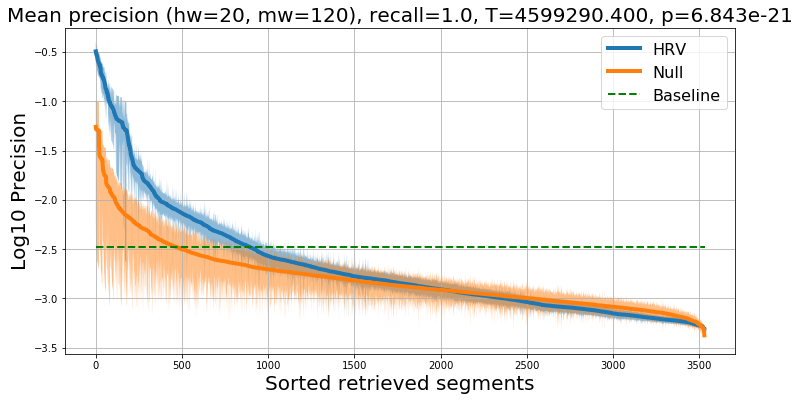

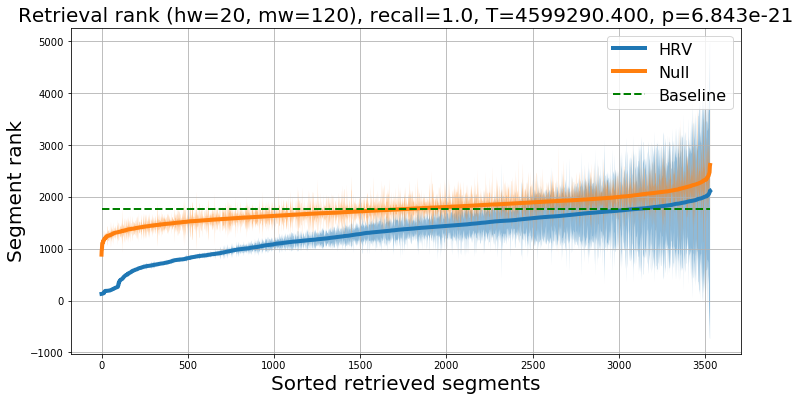

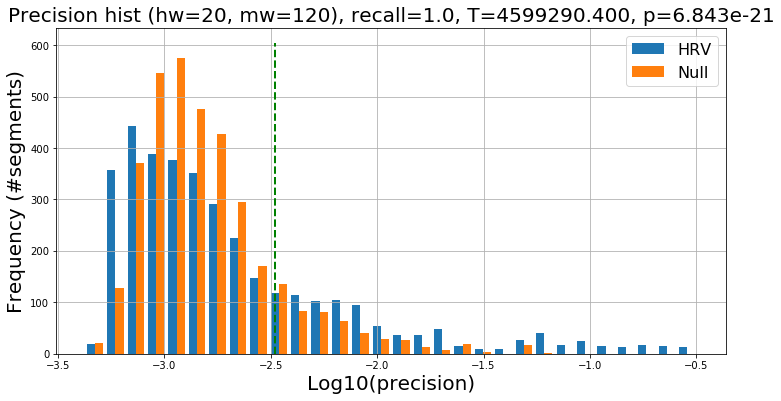

[[5.15984450e+006 3.59705363e-036]
 [5.24827350e+006 9.30804929e-031]
 [4.19029150e+006 9.03363668e-126]
 [4.33290600e+006 4.15465450e-109]
 [5.04870900e+006 1.25979472e-043]
 [4.58464000e+006 1.24916497e-082]
 [4.95535850e+006 1.88526383e-050]
 [4.86630750e+006 1.93133008e-057]
 [4.57431500e+006 1.21406453e-083]
 [3.85579700e+006 1.43197897e-169]
 [4.57939700e+006 3.83116792e-083]
 [4.86092350e+006 7.05126158e-058]
 [4.68977300e+006 1.11297739e-072]
 [4.47960250e+006 3.18975358e-093]
 [4.94092900e+006 1.49475501e-051]
 [4.27149150e+006 3.89426073e-116]
 [3.59441550e+006 2.10445365e-208]
 [3.86524600e+006 3.04819038e-168]
 [4.42597800e+006 6.98937823e-099]
 [5.46160950e+006 1.36853995e-019]]


In [2]:
# Extract HRV and Movie Precision-Recall Data First 
# Evaluate movie segment retrieval across all subjects, cross-validated by held-out subject

# Set HRV extraction and retrieval parameters (in seconds)
hrv_params = {'hr_win': 20, 'hr_hop': 2, 'match_win': 120, 'match_hop': 2}

# Extract per-subject HRV data from raw ECG data
# This function will populate the global array: f.hr_data
f.extract_hrv_all(hr_win=hrv_params['hr_win'], hr_hop=hrv_params['hr_hop'])

plt.rcParams['figure.figsize']=(12,6) # Make figures a reasonable shape
# Evaluate between-subject HRV-based movie segment retrieval
# Returns per-subject true-model precision, null-model precision, and t-test results
prec, null, tt = f.evaluate_prec_all(test_fun=mannwhitneyu, match_win=hrv_params['match_win'], 
                                     match_hop=hrv_params['match_hop'])
print tt # t-test result

<h2>Analysis 2: Load and Inspect Emotion Annotations</h2>

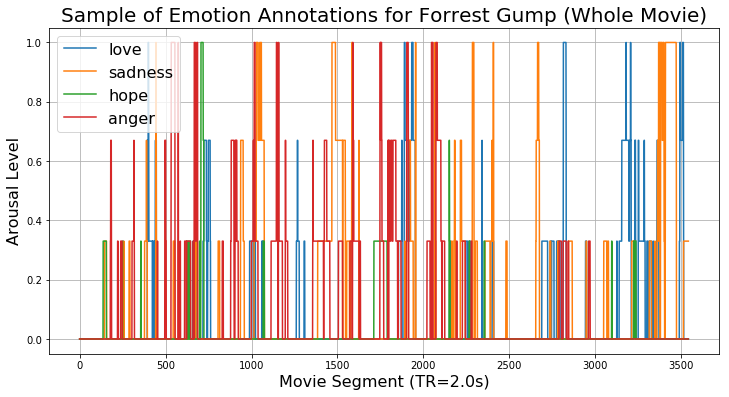

In [3]:
# Location of whole-movie portrayed emotion annotations for all characters in Forrest Gump
emotions_fname='stimulus/task001/annotations/emotions/timeseries/ioats_2s_ao_allchar.csv'

def get_movie_emotion_annotations(fname=emotions_fname, show=True):
    """
    Load movie annotation data, portrayed emotions for all characters in Forrest Gump
    Movie annotations are loaded from directory: stimulus/task001/annotations/emotions/timeseries
    returns:
        head - labels for each emotion category (used for plots)
        emo  - whole-movie per-TR emotion annotations corresponding to each head label
    """
    with open(fname,'r') as emo_file:
        csv_reader = csv.reader(emo_file, delimiter=',')
        head=csv_reader.next()
        emo = np.array([float(col) for row in csv_reader for col in row]).reshape(-1,len(head))
    if(show):
        #plt.plot( ((emo[:,0]+1)/2) * emo[:,1])
        plt.plot(emo[:,head.index('love')])
        plt.plot(emo[:,head.index('sadness')])
        plt.plot(emo[:,head.index('hope')])
        plt.plot(emo[:,head.index('angerrage')])
        plt.title('Sample of Emotion Annotations for Forrest Gump (Whole Movie)', fontsize=20)
        plt.xlabel('Movie Segment (TR=2.0s)', fontsize=16)
        plt.ylabel('Arousal Level', fontsize=16)
        plt.axis('tight')
        plt.grid()
        plt.legend(['love','sadness','hope','anger'],fontsize=16,loc=2)
    return head, emo

# get emotion categories and whole-movie emotion ratings
head, emo = get_movie_emotion_annotations() 

<h2>Analysis 3: inspect Between-Subject-HRV / Emotion Correlations (Whole Movie)</h2>

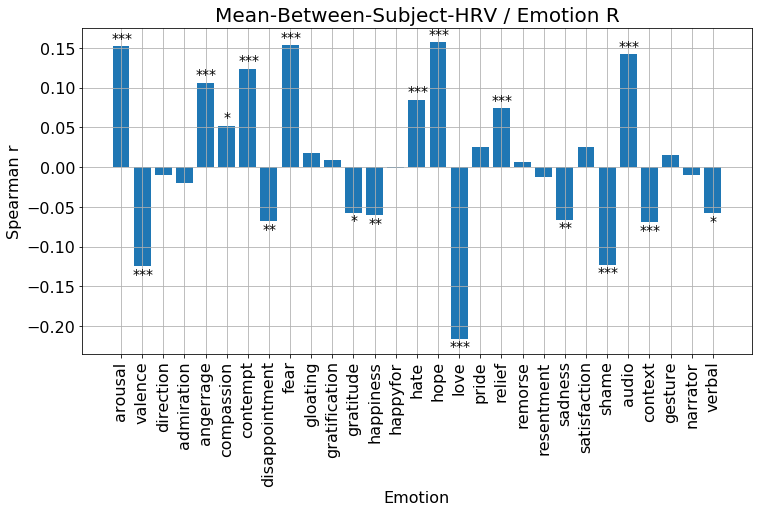

In [4]:
def fix_nan_hr_data():
    # fix hr_data by replacing column nan with mean of non-nan rows
    # Nan (not-a-number) occurs when the raw HR data is very noisy or flat-lined
    hr_data = np.array(f.hr_data)
    for c in np.arange(hr_data.shape[1]):
        nidx = np.where(np.isnan(hr_data[:,c]))[0]
        idx = np.setdiff1d(np.arange(hr_data.shape[0]),nidx)
        if len(nidx) and len(idx):
            hr_data[nidx,c]=hr_data[idx,c].mean() # replace with non-nan column mean    
    return hr_data

def corr_hrv_emotion(hrm, emo):
    """
    between-subject hrv-emotions correlation
    """
    N = min(len(hrm),len(emo[:,0])) # adjust for different lengths, assume sync
    hr_emo_corrs=[]
    hr_emo_p=[]
    for h in head:
        pr=spearmanr(hrm[:N], emo[:N,head.index(h)])
        hr_emo_corrs.append(pr[0])
        hr_emo_p.append(pr[1])
    hr_emo_corrs = np.array(hr_emo_corrs)
    hr_emo_p = np.array(hr_emo_p)
    return hr_emo_corrs, hr_emo_p

def corr_hrv_emotion_bs(show=True):
    """
    Correlate mean-between-subject hrv with emotions annotaions
    """
    f.hr_data = fix_nan_hr_data() # fix nans, zero-variance traces
    hrm=f.hr_data.mean(0) # between-subject mean heart-rate per segment    
    hr_emo_corrs, hr_emo_p = corr_hrv_emotion(hrm, emo)
    if(show):
        f.plt.rcParams['figure.figsize']=(12,6)
        plt.bar(head,hr_emo_corrs)
        plt.grid()
        plt.title('Mean-Between-Subject-HRV / Emotion R',fontsize=20)
        plt.xlabel('Emotion',fontsize=16)
        plt.ylabel('Spearman r',fontsize=16)
        l=plt.xticks(rotation=90)
        l=plt.xticks(fontsize=16)
        l=plt.yticks(fontsize=16)
        idx=np.where(hr_emo_p<=0.005)[0]
        for i in idx:
            if hr_emo_p[i]<0.005: str='*'
            if hr_emo_p[i]<0.0005: str='**'
            if hr_emo_p[i]<0.00005: str='***'
            plt.text(i-0.15*len(str), hr_emo_corrs[i]+(np.sign(hr_emo_corrs[i])*0.01-0.005),str,fontsize=14)
    return hr_emo_corrs, hr_emo_p

# Get mean hr-emotion correlations and p-values 
hr_emo_corrs, hr_emo_p = corr_hrv_emotion_bs(show=True)

<h2>Analysis 4: Retrieve Movie Locations by Highest-Precision Segments (Recalled by HRV)</h2>

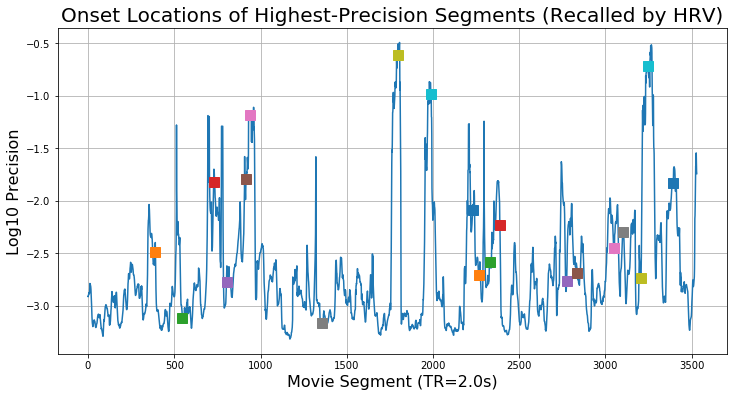

In [5]:
# Calculate mean precision of true model
pm=prec.mean(0)
# Sort movie segments by highest precision
topSegs=np.argsort(pm)[::-1]
tN=500 # How many segments to retrieve, many will be redundant nearby locations
topN=topSegs[:tN]
plt.plot(np.arange(len(pm)),np.log10(pm))
plt.grid()
# filter-out redundant topN segment locations, retrieving onsets of continguous segments
locs = np.r_[np.sort(topN)[0],np.sort(topN)[np.where(np.diff(np.sort(topN))>10)[0]+1]] # in TRs
offset = hrv_params['match_win'] / hrv_params['match_hop'] / 2 + hrv_params['hr_win'] / hrv_params['hr_hop'] / 2 # compensate for movie segment length and hop
for k in range(len(locs)):
    if(locs[k]<=len(pm)-offset):
        plt.plot(locs[k]+offset,np.log10(pm[locs[k]+offset]),marker='s',markerSize=10)
plt.title('Onset Locations of Highest-Precision Segments (Recalled by HRV)', fontsize=20)
plt.xlabel('Movie Segment (TR=2.0s)', fontsize=16)
l=plt.ylabel('Log10 Precision', fontsize=16)

<h2>Analysis 5: Retrieve Annotations for Highest-Precision Segments (Recalled by HRV)</h2>
<h3>Observation: All High-Precision Segments Contain +ve/-ve or -ve/+ve Valence Shift</h3>

In [7]:
# Load movie segment narrative annotations (indexed by time in seconds)
with open('./stimulus/task001/annotations/emotions/segmentation/emotions_ao_1s_thr50.tsv','rt') as csv_f:
    csv_reader = csv.reader(csv_f, delimiter='\t')
    annot=[row for row in csv_reader]
    idx=[int(float(i)) for i in np.array(annot)[:,0]]
times=locs*2 # convert topN segment locations to time in seconds
for t in times: # For each segment, retrieve all within-segment movie annotations
    tt0 = np.where(idx>=t)[0]
    tt1 = np.where(idx>=(t+hrv_params['match_win']))[0]
    if len(tt0) and len(tt1):
        print t, np.array(annot)[tt0[0]:tt1[0],2]

706 ['char=MRSGUMP tags=pos,other,verbal arousal=0.00 val_pos=0.67 val_neg=0.00'
 'char=WOMAN tags=la,pos,happiness,audio arousal=-0.67 val_pos=0.67 val_neg=0.00'
 'char=BOY tags=la,neg,other,contempt,verbal arousal=-0.67 val_pos=0.00 val_neg=0.67'
 'char=BOY tags=la,neg,other,contempt,verbal arousal=-0.67 val_pos=0.00 val_neg=0.67'
 'char=BOY tags=la,neg,other,contempt,verbal arousal=-0.67 val_pos=0.00 val_neg=0.67'
 'char=FORREST tags=la,pos,other,love,verbal arousal=-0.67 val_pos=0.67 val_neg=0.00'
 'char=FORRESTVO tags=la,pos,other,love,verbal arousal=-1.00 val_pos=1.00 val_neg=0.00'
 'char=FORREST tags=la,neg arousal=-0.67 val_pos=0.00 val_neg=0.67']
1024 ['char=MAN tags=la,neg,other,contempt,verbal arousal=-0.67 val_pos=0.00 val_neg=0.67'
 'char=JENNY tags=neg,fear,verbal arousal=0.00 val_pos=0.00 val_neg=0.67'
 'char=JENNYSDAD tags=ha,neg,other,verbal arousal=1.00 val_pos=0.00 val_neg=1.00'
 'char=JENNY tags=neg,self,fear,verbal arousal=-0.33 val_pos=0.00 val_neg=1.00'
 'char=JE

<h2>Analysis 6: Inspect Individual Differences in HRV-Emotion Correlations</h2>
<h2>Within-Subject-HRV / Emotion Correlations (Whole Movie)</h2>

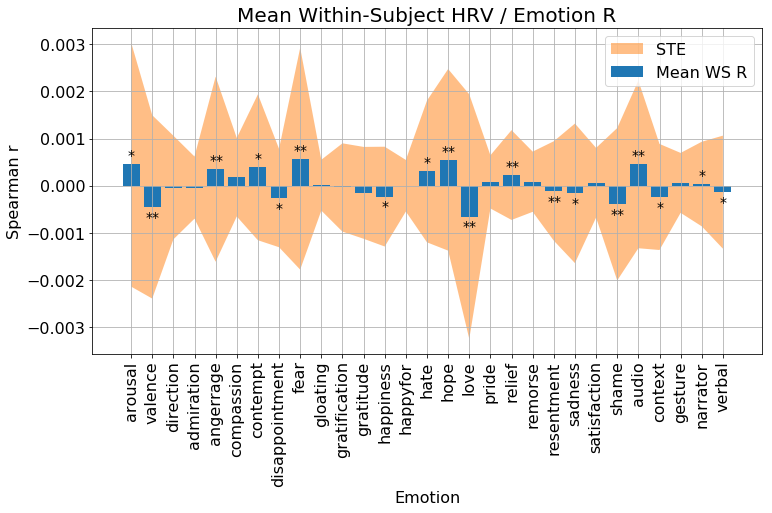

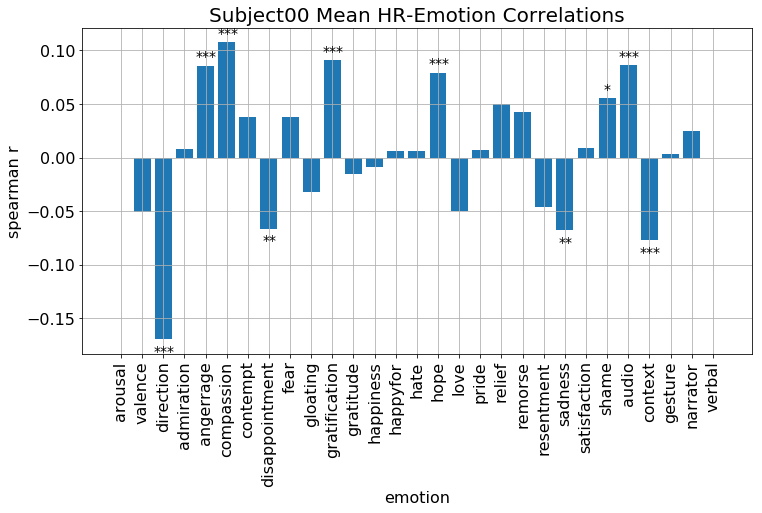

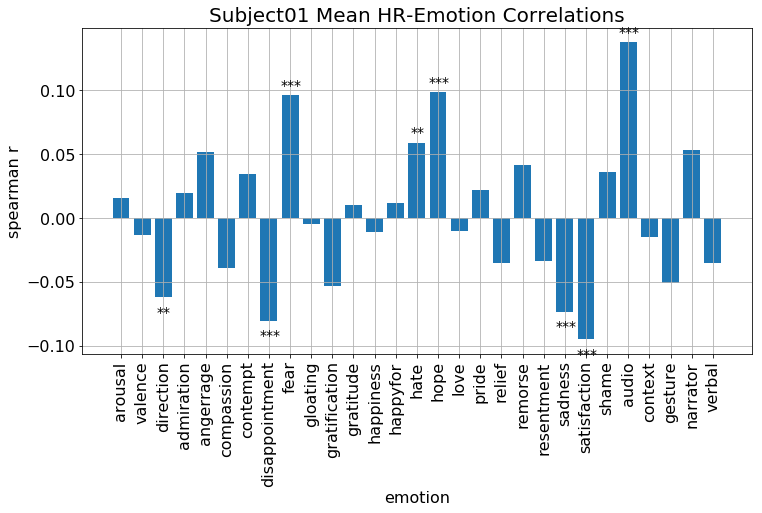

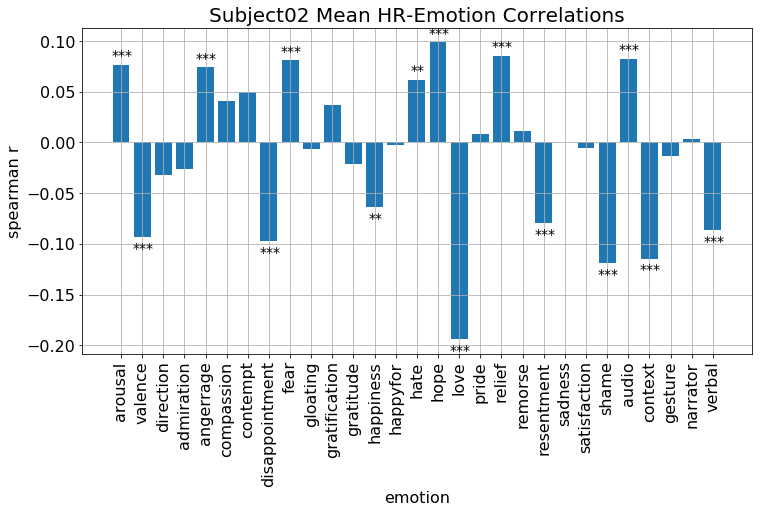

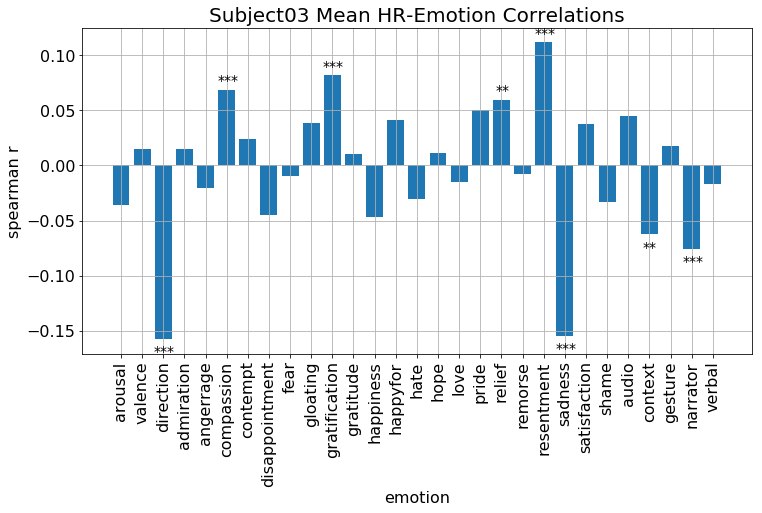

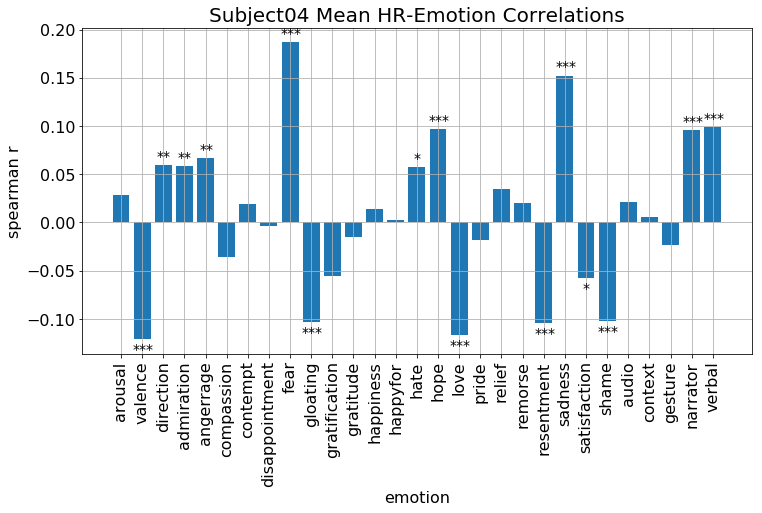

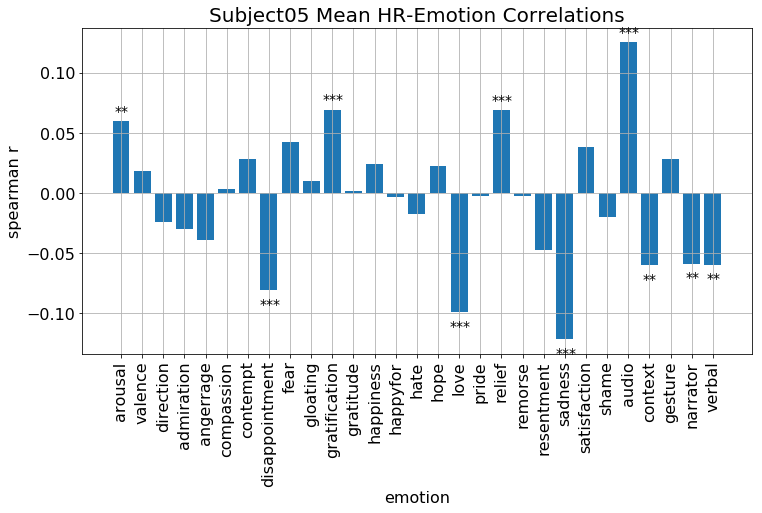

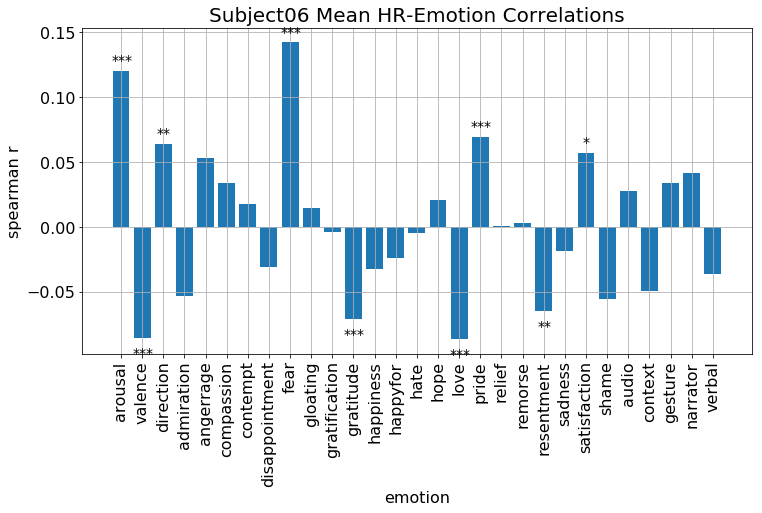

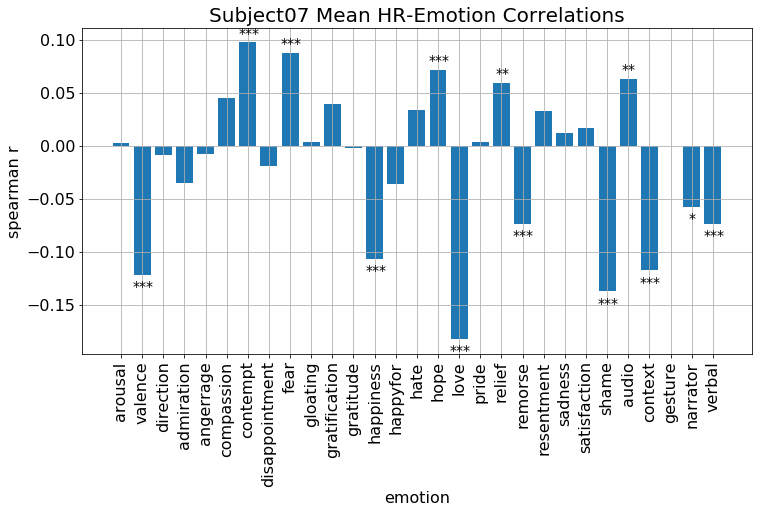

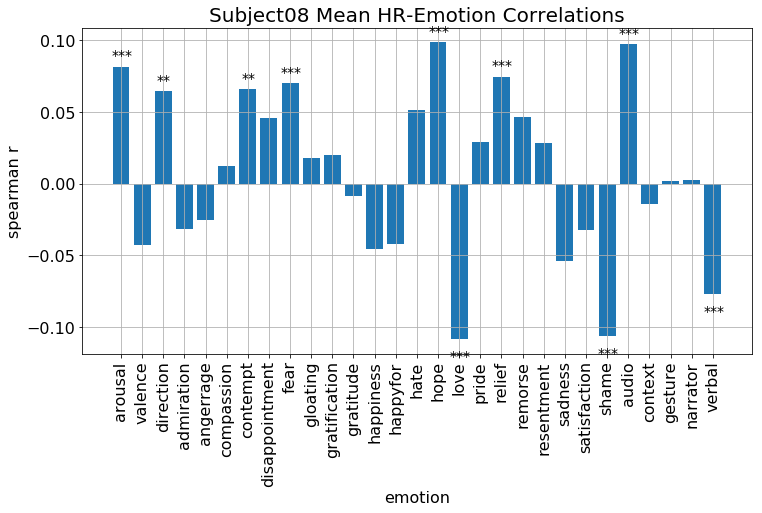

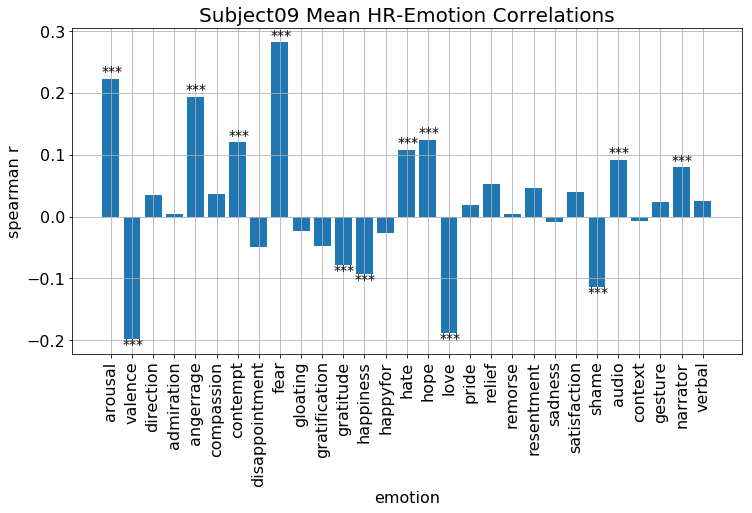

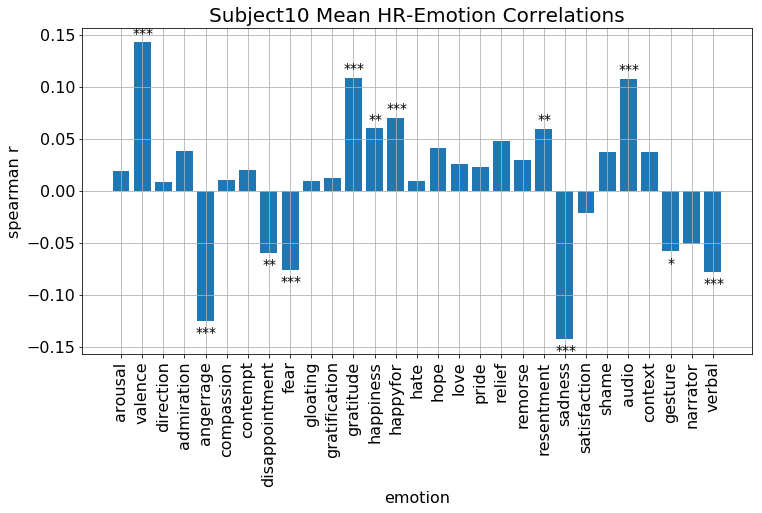

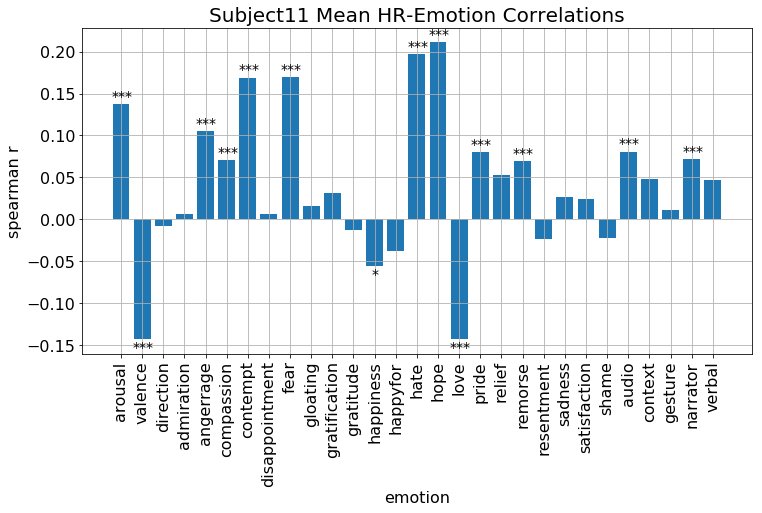

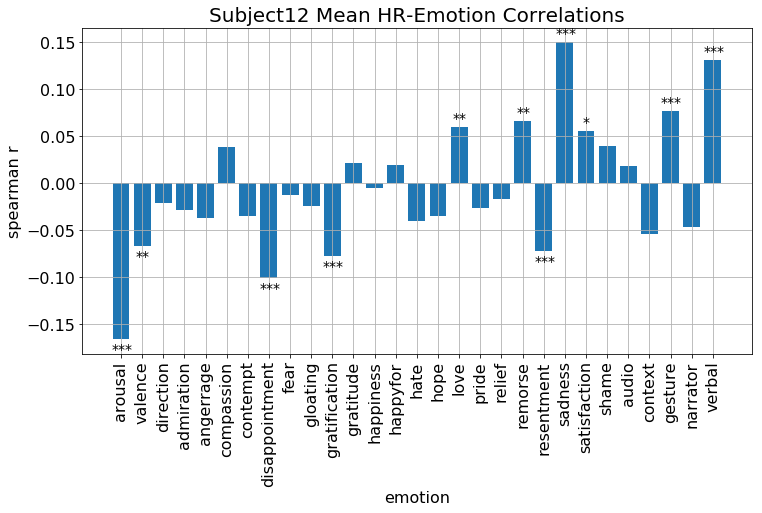

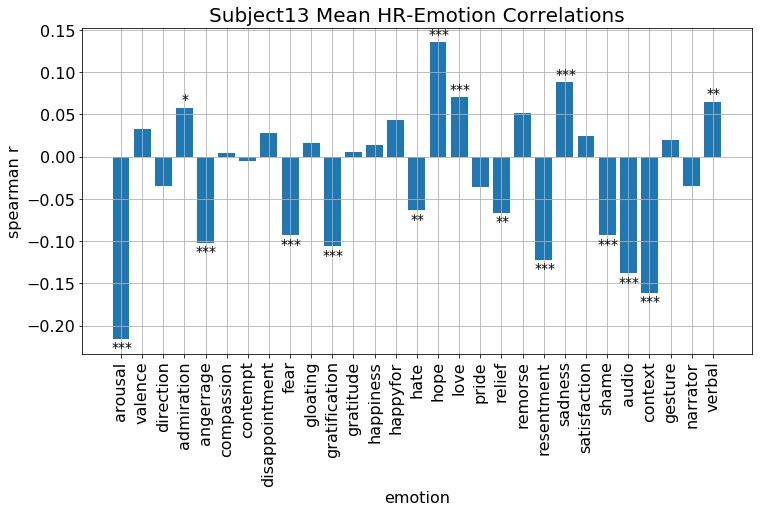

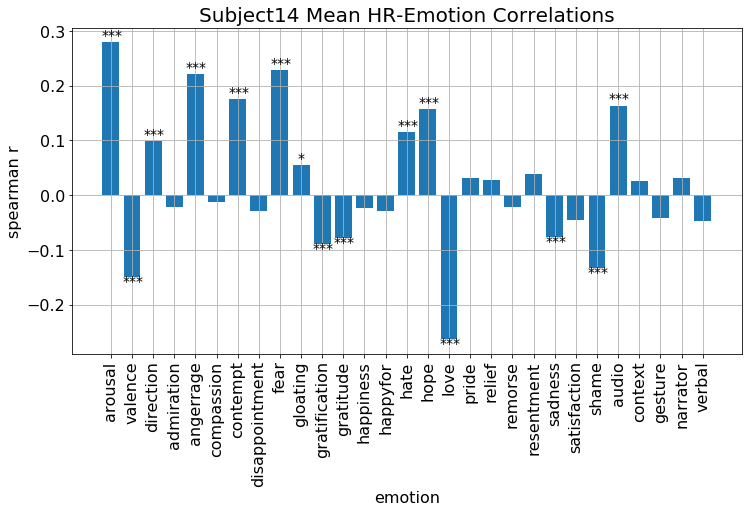

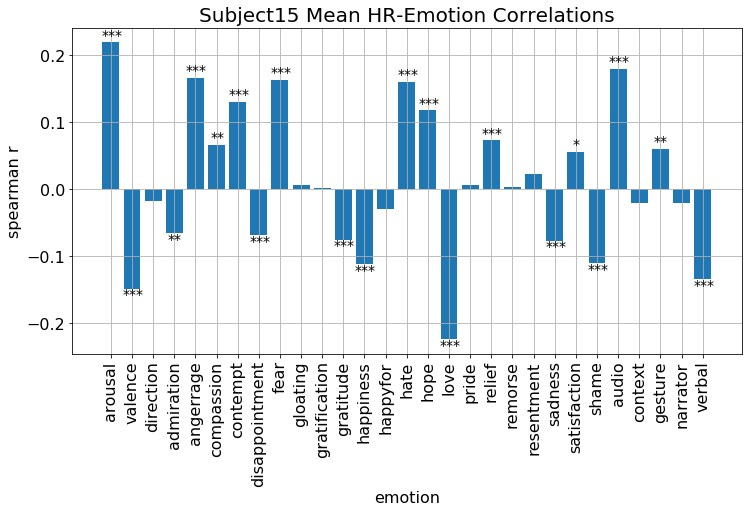

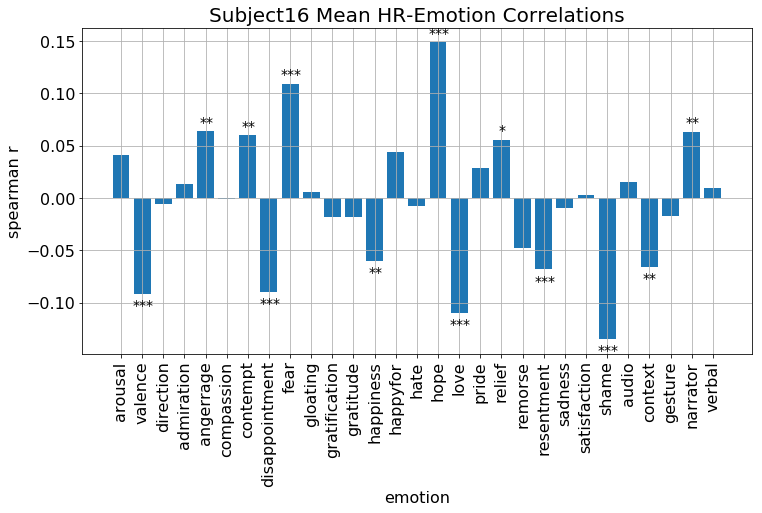

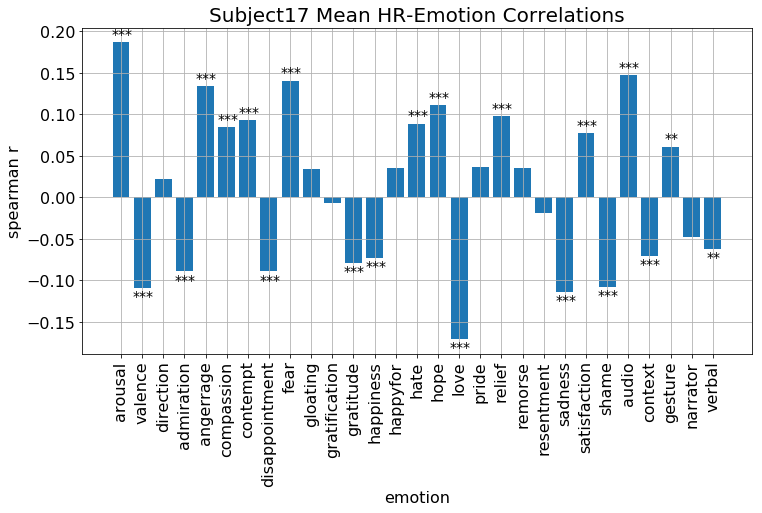

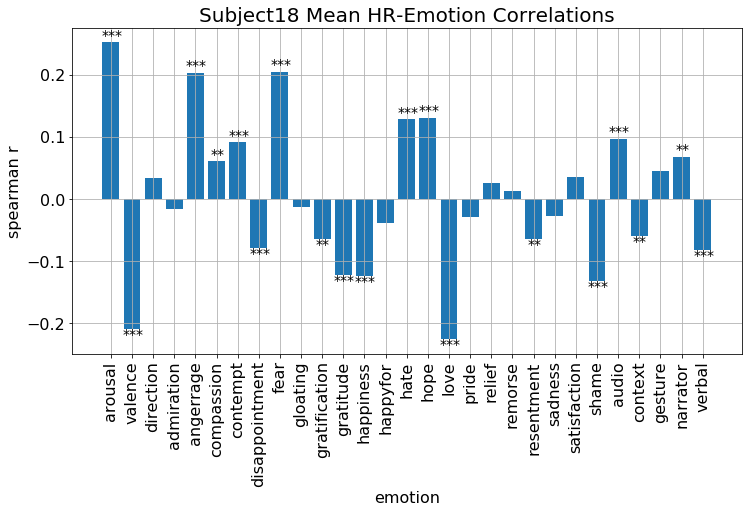

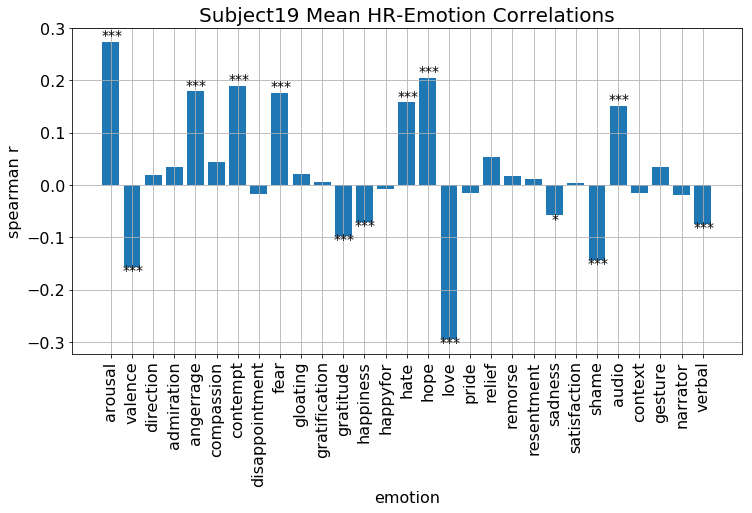

In [8]:
def corr_hrv_emotion_ws(show=True, show_individual=False):
    """
    within-subject hrv-emotions correlation
    """
    N = min(len(f.hr_data[0]),len(emo[:,0])) # adjust for different lengths, assume sync
    wsc_hr_emo_corrs=np.zeros((N,len(head))) # preallocate arrays, n_subj x n_emotions
    wsc_hr_emo_p=np.zeros((N,len(head)))
    for k in range(len(f.hr_data)):
        for j,h in enumerate(head):
            pr=spearmanr(f.hr_data[k,:N], emo[:N,head.index(h)])
            wsc_hr_emo_corrs[k,j]=pr[0]
            wsc_hr_emo_p[k,j]=pr[1]
    wsc_hr_emo_corrs=np.array(wsc_hr_emo_corrs)
    wsc_hr_emo_p=np.array(wsc_hr_emo_p)
    # Show average of individual within-subject hrv-emotions correlations
    if show:
        plt.figure()
        avg_hr_emo_corrs=wsc_hr_emo_corrs.mean(0)
        ste_hr_emo_corrs=wsc_hr_emo_corrs.std(0)/np.sqrt(f.n_subjects)
        avg_hr_emo_p=wsc_hr_emo_p.mean(0)
        plt.bar(head, avg_hr_emo_corrs)
        plt.grid()
        plt.title('Mean Within-Subject HRV / Emotion R',fontsize=20)
        plt.xlabel('Emotion',fontsize=16)
        plt.ylabel('Spearman r',fontsize=16)
        y=avg_hr_emo_corrs
        ye=ste_hr_emo_corrs # *1.96 95% confidence intervals
        plt.fill_between(np.arange(len(head)),y-ye, y+ye,alpha=0.5)
        plt.xticks(rotation=90)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.legend(['STE','Mean WS R'], fontsize=16)
        idx=np.where(avg_hr_emo_p<0.001)[0]
        for i in idx:
            if avg_hr_emo_p[i]<0.005: str='*'
            if avg_hr_emo_p[i]<0.0005: str='**'
            if avg_hr_emo_p[i]<0.00005: str='***'
            plt.text(i-0.15*len(str), avg_hr_emo_corrs[i]+(np.sign(avg_hr_emo_corrs[i])*0.0002-0.0001),str,fontsize=14)
    # Show individual within-subject hrv-emotions correlations
    if show_individual:
        for subj in range(len(f.hr_data)):
            plt.figure()
            plt.bar(head,wsc_hr_emo_corrs[subj, :])
            plt.grid()
            plt.title('Subject%02d Mean HR-Emotion Correlations'%(subj),fontsize=20)
            plt.xlabel('emotion',fontsize=16)
            plt.ylabel('spearman r',fontsize=16)
            l=plt.xticks(rotation=90)
            l=plt.xticks(fontsize=16)
            l=plt.yticks(fontsize=16)
            idx=np.where(wsc_hr_emo_p[subj]<0.001)[0]
            for i in idx:
                if wsc_hr_emo_p[subj,i]<0.005: str='*'
                if wsc_hr_emo_p[subj,i]<0.0005: str='**'
                if wsc_hr_emo_p[subj,i]<0.00005: str='***'
                plt.text(i-0.15*len(str), wsc_hr_emo_corrs[subj,i]+(np.sign(wsc_hr_emo_corrs[subj,i])*0.01-0.005),str,fontsize=14)
    return wsc_hr_emo_corrs, wsc_hr_emo_p

wsc_hr_emo_corrs, wsc_hr_emo_p = corr_hrv_emotion_ws(show=True, show_individual=True)

<h2>Analysis 7: Inspect Within-Subject HR Traces (Per Movie Segments, TR=2.0s)</h2>

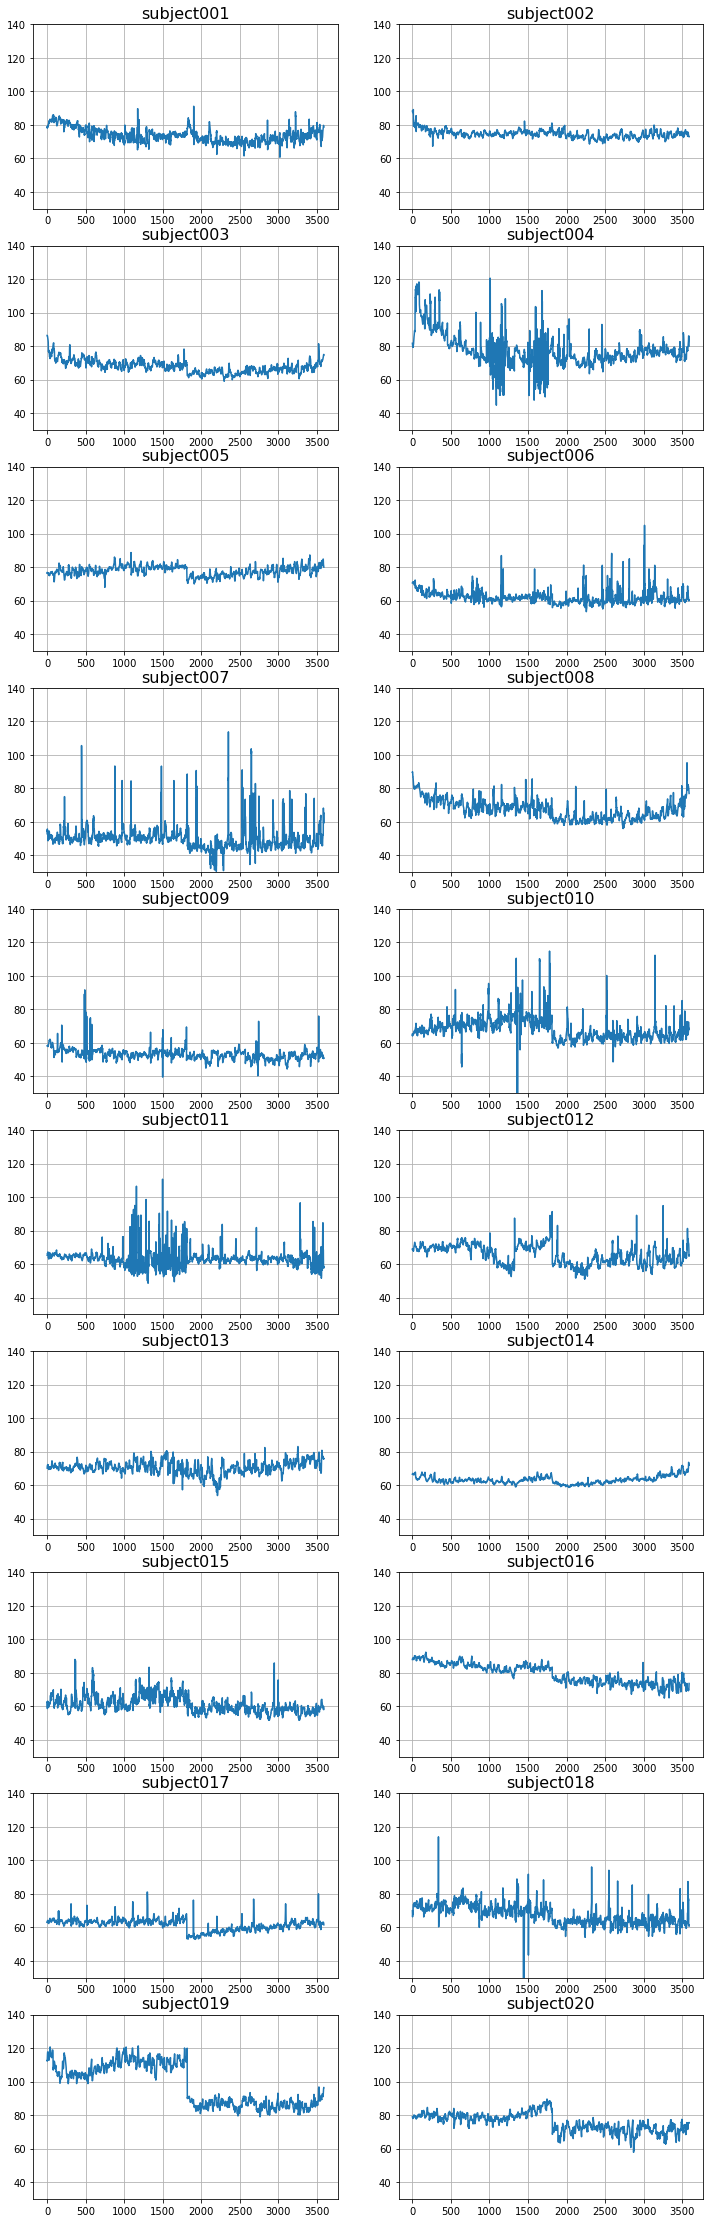

In [9]:
# Plot the individual whole-movie HR trace, showing HRV correlations for whole movie (2s TR)
f.plt.rcParams['figure.figsize']=(12,40)
for k in range(f.n_subjects):
    plt.subplot(10,2,k+1)
    plt.plot(f.hr_data[k])
    plt.grid()
    plt.ylim([30,140])
    plt.title('subject%03d'%(k+1),fontsize=16)


<h2>Analysis 8: Demonstrate Heart-Rate Extraction via Auto-Correlation Peaks</h2>

In [10]:
data = f.load_all_subj_data()

Loading studyforrest task001 CACHED physiological data...


   peaks: [  0  97 192 289 385]
 bpm raw: [61 63 61 62]
bpm mean: 61.75
 rpeaks': [  0  97 192 289 385]
bpm raw': [61 63 61 62]
bpm mean: 61.75
bpm  std: 0.82915619758885
{'hr_mean': 61.75, 'hr_var': 0.82915619758885}


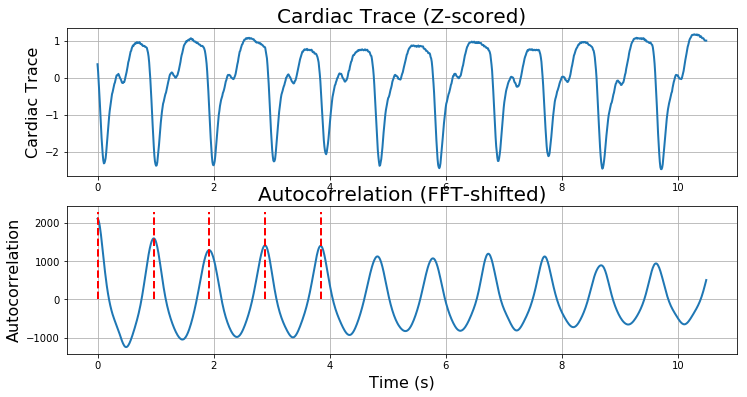

In [11]:
def hr_extact_acorr(num_peaks=5):
    # Extact HR varying as a function of time (HRV) via auto-correlation peaks in ECG tiem series    
    # Development of a new R-R peak-detection algorithm
    # Choose a random subject, random location and random duration
    ri=np.random.randint
    rt=ri(300)
    rd=ri(5,30) 
    x=f.get_subject_run(ri(f.n_subjects),ri(f.n_runs),[rt,rt+rd])[:,2]
    x=f.zscore(x)
    a=fftshift(np.correlate(x,x,"same"))[:len(x)/2] # Shift center of auto-correlation to start
    peaks, _ = find_peaks(np.array(a),height=0) # Locate all peaks
    peaks = np.r_[0,peaks][:num_peaks] # Add start-point peak
    # Filter-out spurious peaks
    d=np.diff(peaks)
    print "   peaks:",peaks
    print " bpm raw:",6000/d
    print "bpm mean:",(6000/d).mean()
    idx=np.where(((6000/d)>40) & ((6000/d)<160))[0] # constrain to BPM range 50..150
    if len(idx) < len(peaks)-1:
        print "removed", len(d)-len(idx), "spurious peaks", np.setdiff1d(np.arange(len(d)),idx)+1
    rpeaks=peaks[np.r_[0,idx+1]]    
    dd=np.diff(rpeaks)
    print " rpeaks':",rpeaks
    print "bpm raw':", 6000/dd
    print "bpm mean:", (6000/dd).mean()
    print "bpm  std:", (6000/dd).std()
    if True:
        plt.subplot(211)
        plt.plot(np.arange(len(x)/2)*0.01, x[:len(x)/2], linewidth=2)
        plt.title('Cardiac Trace (Z-scored)', fontsize=20)
        plt.ylabel('Cardiac Trace', fontsize=16)
        plt.grid()
        plt.subplot(212)
        plt.plot(np.arange(len(x)/2)*0.01, a, linewidth=2)
        axes=plt.gca()
        yl=axes.get_ylim()[1]
        plt.plot(np.array([peaks,peaks])*0.01,[0,yl],'r--', linewidth=2)    
        plt.title('Autocorrelation (FFT-shifted)', fontsize=20)
        plt.ylabel('Autocorrelation', fontsize=16)
        plt.xlabel('Time (s)', fontsize=16)
        plt.grid()
    return {'hr_mean': (6000/dd).mean(), 'hr_var': (6000/dd).std()}

# Extact HR varying as a function of time (HRV) via auto-correlation peaks in ECG tiem series
print hr_extact_acorr(num_peaks=5)
